In [1]:
import pandas as pd
import requests
import json
from pathlib import Path
import re
from datetime import date
import time
import os
from fastai.tabular import *
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
with open(r'data/wiki_item_names') as f:
    item_names = f.readlines()
    cleaned_item_names = [name.strip() for name in item_names]

In [4]:
# cleaned_item_names

In [5]:
def get_item_df(item_name, sleppy_time=1):
    base_url = r"https://oldschool.runescape.wiki/api.php?action=query&prop=revisions&rvprop=content&format=json&titles=Module%3AExchange%2F"
    postfix_url = r"%2FData"
    full_url = f'{base_url}{item_name}{postfix_url}'
    resp = requests.get(full_url)
    jsond = resp.json()
    try:
        regex_text = jsond['query']['pages'][next(iter(jsond['query']['pages'].keys()))]['revisions'][0]['*']
        m = re.findall(r'[\d]+:[\d]+', regex_text)
        item_df = pd.DataFrame()
        item_df['dt'] = [int(string.split(':')[0]) for string in m]
        item_df[f'{item_name} price'] = [int(string.split(':')[1]) for string in m]
        item_df['date_obj'] = item_df['dt'].apply(lambda x: date.fromtimestamp(x))
        item_df.set_index('date_obj', inplace=True)
        item_df = item_df.drop('dt', axis=1)
        time.sleep(sleppy_time)
        return item_df
    except:
        pass

In [6]:
def retrieve_dfs(xslice = True):
    if xslice:
        item_dfs = [get_item_df(item_name,1) for item_name in cleaned_item_names[40:45]]
    else:
        item_dfs = [get_item_df(item_name,1) for item_name in cleaned_item_names]
    return item_dfs

In [65]:
# item_dfs = retrieve_dfs(False)

In [68]:
item_dfs

[            3rd%20age%20amulet price
 date_obj                            
 2015-03-26                   8135122
 2015-03-27                   8135122
 2015-03-28                   8135122
 2015-03-29                   8135122
 2015-03-30                   8135122
 ...                              ...
 2020-05-09                  21895776
 2020-05-10                  21895776
 2020-05-11                  21895776
 2020-05-12                  22812427
 2020-05-13                  22812427
 
 [1826 rows x 1 columns],
             3rd%20age%20axe price
 date_obj                         
 2016-07-06              300000000
 2016-07-07              300000000
 2016-07-08              300000000
 2016-07-09              300000000
 2016-07-10              310633064
 ...                           ...
 2020-05-09              244161866
 2020-05-10              244161866
 2020-05-11              244161866
 2020-05-12              244161866
 2020-05-13              244161866
 
 [1364 rows x 1 colum

In [79]:
def save_dfs(item_dfs):
    for df in item_dfs:
        try:
            df.to_csv(f'./data/wiki_prices/{df.columns[0]}.csv')
        except:
            pass

In [80]:
save_dfs(item_dfs)

In [7]:
def load_dfs():
    item_dfs = []
    for name in list(os.walk('./data/wiki_prices'))[0][2]:
        df = pd.read_csv(f'./data/wiki_prices/{name}')
        df = df.set_index(df.columns[0])
        item_dfs.append(df)
    return item_dfs

In [8]:

item_dfs = load_dfs()

In [9]:
item_dfs

[            3rd%20age%20amulet price
 date_obj                            
 2015-03-26                   8135122
 2015-03-27                   8135122
 2015-03-28                   8135122
 2015-03-29                   8135122
 2015-03-30                   8135122
 ...                              ...
 2020-05-09                  21895776
 2020-05-10                  21895776
 2020-05-11                  21895776
 2020-05-12                  22812427
 2020-05-13                  22812427
 
 [1826 rows x 1 columns],
             3rd%20age%20axe price
 date_obj                         
 2016-07-06              300000000
 2016-07-07              300000000
 2016-07-08              300000000
 2016-07-09              300000000
 2016-07-10              310633064
 ...                           ...
 2020-05-09              244161866
 2020-05-10              244161866
 2020-05-11              244161866
 2020-05-12              244161866
 2020-05-13              244161866
 
 [1364 rows x 1 colum

In [10]:
df_dict = {}

In [11]:
for df in item_dfs:
    try:
        df_dict[df.columns[0]] = df
    except:
        pass

In [12]:
df_dict

{'3rd%20age%20amulet price':             3rd%20age%20amulet price
 date_obj                            
 2015-03-26                   8135122
 2015-03-27                   8135122
 2015-03-28                   8135122
 2015-03-29                   8135122
 2015-03-30                   8135122
 ...                              ...
 2020-05-09                  21895776
 2020-05-10                  21895776
 2020-05-11                  21895776
 2020-05-12                  22812427
 2020-05-13                  22812427
 
 [1826 rows x 1 columns],
 '3rd%20age%20axe price':             3rd%20age%20axe price
 date_obj                         
 2016-07-06              300000000
 2016-07-07              300000000
 2016-07-08              300000000
 2016-07-09              300000000
 2016-07-10              310633064
 ...                           ...
 2020-05-09              244161866
 2020-05-10              244161866
 2020-05-11              244161866
 2020-05-12              244161866
 2020

In [13]:
item_name = 'Red%20chinchompa price'

In [14]:
item_df_training = df_dict[item_name]

In [15]:
item_df_training[item_name]

date_obj
2015-03-26    1210
2015-03-27    1210
2015-03-28    1243
2015-03-29    1241
2015-03-30    1210
              ... 
2020-05-09    1587
2020-05-10    1521
2020-05-11    1481
2020-05-12    1430
2020-05-13    1415
Name: Red%20chinchompa price, Length: 1804, dtype: int64

In [16]:
for i in range(90):
    item_df_training[f'{item_name} {i} days ago'] = item_df_training[item_name].shift(i)

In [17]:
rolling_averages = [3,7,14,21,30,60,90]

In [18]:
for rolling_average in rolling_averages:
    item_df_training[f'{item_name} {rolling_average} day rolling average'] = item_df_training[item_name].rolling(rolling_average).mean()

In [19]:
for rolling_average in rolling_averages:
    item_df_training[f'{item_name} delta {rolling_average} day rolling average'] = item_df_training[item_name] - item_df_training[f'{item_name} {rolling_average} day rolling average']

In [20]:
item_df_training['Y'] = item_df_training[item_name].shift(-7)

In [21]:
item_df_training.tail(10)

Red%20chinchompa price  Red%20chinchompa price 0 days ago  \
date_obj                                                                
2020-05-04                    1652                               1652   
2020-05-05                    1641                               1641   
2020-05-06                    1636                               1636   
2020-05-07                    1627                               1627   
2020-05-08                    1621                               1621   
2020-05-09                    1587                               1587   
2020-05-10                    1521                               1521   
2020-05-11                    1481                               1481   
2020-05-12                    1430                               1430   
2020-05-13                    1415                               1415   

            Red%20chinchompa price 1 days ago  \
date_obj                                        
2020-05-04                             1663.0   
2020-05-05                             1652.0   
2020-05-06                             1641.0   
2020-05-07                             1636.0   
2020-05-08                             1627.0   
2020-05-09                             1621.0   
2020-05-10                             1587.0   
2020-05-11                             1521.0   
2020-05-12                             1481.0   
2020-05-13                             1430.0   

            Red%20chinchompa price 2 days ago  \
date_obj                                        
2020-05-04                             1668.0   
2020-05-05                             1663.0   
2020-05-06                             1652.0   
2020-05-07                             1641.0   
2020-05-08                             1636.0   
2020-05-09                             1627.0   
2020-05-10                             1621.0   
2020-05-11                             1587.0   
2020-05-12                             1521.0   
2020-05-13                             1481.0   

            Red%20chinchompa price 3 days ago  \
date_obj                                        
2020-05-04                             1673.0   
2020-05-05                             1668.0   
2020-05-06                             1663.0   
2020-05-07                             1652.0   
2020-05-08                             1641.0   
2020-05-09                             1636.0   
2020-05-10                             1627.0   
2020-05-11                             1621.0   
2020-05-12                             1587.0   
2020-05-13                             1521.0   

            Red%20chinchompa price 4 days ago  \
date_obj                                        
2020-05-04                             1671.0   
2020-05-05                             1673.0   
2020-05-06                             1668.0   
2020-05-07                             1663.0   
2020-05-08                             1652.0   
2020-05-09                             1641.0   
2020-05-10                             1636.0   
2020-05-11                             1627.0   
2020-05-12                             1621.0   
2020-05-13                             1587.0   

            Red%20chinchompa price 5 days ago  \
date_obj                                        
2020-05-04                             1642.0   
2020-05-05                             1671.0   
2020-05-06                             1673.0   
2020-05-07                             1668.0   
2020-05-08                             1663.0   
2020-05-09                             1652.0   
2020-05-10                             1641.0   
2020-05-11                             1636.0   
2020-05-12                             1627.0   
2020-05-13                             1621.0   

            Red%20chinchompa price 6 days ago  \
date_obj                                        
2020-05-04                             1624.0   
2020-05-05                             1642

In [22]:
item_df_training.shape

(1804, 106)

In [ ]:
#replace drop 

In [23]:
trimmed_df = item_df_training.dropna(how='any')

In [24]:
trimmed_df.shape

(1708, 106)

In [25]:
# train = trimmed_df[0:int(trimmed_df.shape[0]*.8)]

In [26]:
# test = trimmed_df[int(trimmed_df.shape[0]*.8):0]

In [27]:
# train.shape

In [28]:
trimmed_df

Red%20chinchompa price  Red%20chinchompa price 0 days ago  \
date_obj                                                                
2015-06-23                    1317                               1317   
2015-06-24                    1310                               1310   
2015-06-25                    1317                               1317   
2015-06-26                    1332                               1332   
2015-06-27                    1342                               1342   
...                            ...                                ...   
2020-05-02                    1668                               1668   
2020-05-03                    1663                               1663   
2020-05-04                    1652                               1652   
2020-05-05                    1641                               1641   
2020-05-06                    1636                               1636   

            Red%20chinchompa price 1 days ago  \
date_obj                                        
2015-06-23                             1345.0   
2015-06-24                             1317.0   
2015-06-25                             1310.0   
2015-06-26                             1317.0   
2015-06-27                             1332.0   
...                                       ...   
2020-05-02                             1673.0   
2020-05-03                             1668.0   
2020-05-04                             1663.0   
2020-05-05                             1652.0   
2020-05-06                             1641.0   

            Red%20chinchompa price 2 days ago  \
date_obj                                        
2015-06-23                             1392.0   
2015-06-24                             1345.0   
2015-06-25                             1317.0   
2015-06-26                             1310.0   
2015-06-27                             1317.0   
...                                       ...   
2020-05-02                             1671.0   
2020-05-03                             1673.0   
2020-05-04                             1668.0   
2020-05-05                             1663.0   
2020-05-06                             1652.0   

            Red%20chinchompa price 3 days ago  \
date_obj                                        
2015-06-23                             1460.0   
2015-06-24                             1392.0   
2015-06-25                             1345.0   
2015-06-26                             1317.0   
2015-06-27                             1310.0   
...                                       ...   
2020-05-02                             1642.0   
2020-05-03                             1671.0   
2020-05-04                             1673.0   
2020-05-05                             1668.0   
2020-05-06                             1663.0   

            Red%20chinchompa price 4 days ago  \
date_obj                                        
2015-06-23                             1482.0   
2015-06-24                             1460.0   
2015-06-25                             1392.0   
2015-06-26                             1345.0   
2015-06-27                             1317.0   
...                                       ...   
2020-05-02                             1624.0   
2020-05-03                             1642.0   
2020-05-04                             1671.0   
2020-05-05                             1673.0   
2020-05-06                             1668.0   

            Red%20chinchompa price 5 days ago  \
date_obj                                        
2015-06-23                             1453.0   
2015-06-24                             1482.0   
2015-06-25                             1460.0   
2015-06-26                             1392.0   
2015-06-27                             1345.0   
...                                       ...   
2020-05-02                             1593.0   
2020-05-03                             1624.0   
2020-05-04          

In [29]:
procs = [Normalize]

In [30]:
valid_idx = range(int(len(df)*.8), len(df)-60)

In [31]:
dep_var = 'Y'

In [32]:
path = Path(f'./data/wiki_urls/{item_name}')

In [33]:
path

WindowsPath('data/wiki_urls/Red%20chinchompa price')

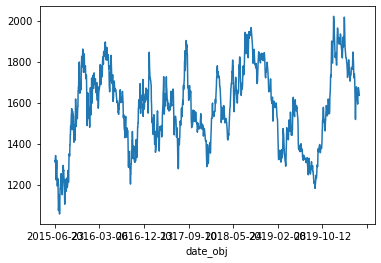

In [34]:
trimmed_df[item_name].plot()

In [35]:
df = trimmed_df

In [36]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=[])

In [37]:
learn = tabular_learner(data, layers=[500,500,100], emb_szs={'native-country': 10}, metrics=mean_squared_error)

In [38]:
data.show_batch()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


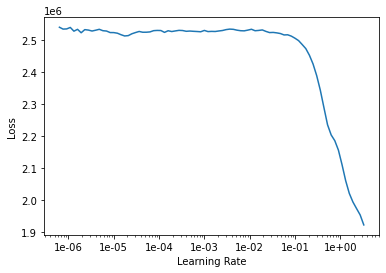

In [40]:
learn.recorder.plot()

In [41]:
learn.save('stage-0')

In [44]:
learn.fit_one_cycle(5, max_lr=3e0)

In [45]:
learn.show_results(ds_type=DatasetType.Train)

In [46]:
learn.save('stage-1')

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


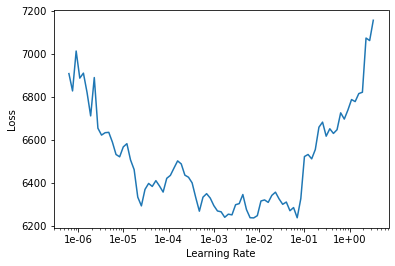

In [48]:
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(5, 3e-3)

In [50]:
learn.show_results(ds_type=DatasetType.Train)

In [51]:
learn.save('stage-2')

In [52]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


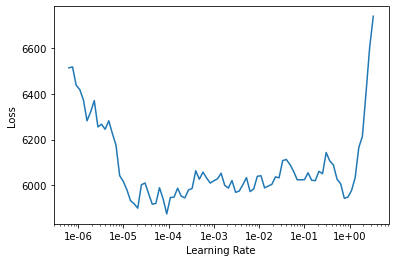

In [53]:
learn.recorder.plot()

In [149]:
learn.save('stage-3')

In [56]:
learn.fit_one_cycle(5, 3e-6)

In [66]:
learn.save('stage-4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


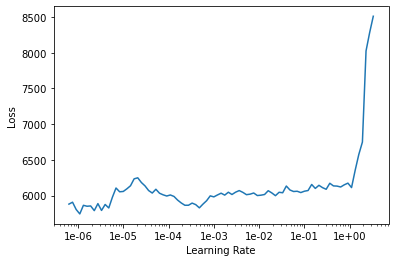

In [67]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(5, 3e-5)

In [87]:
learn.fit_one_cycle(1, 1e-5)

In [92]:
learn = learn.load('stage-4')

In [93]:
learn.show_results(ds_type=DatasetType.Train)

In [94]:
int(learn.predict(df.iloc[0])[1])

1358

In [95]:
learn.predict(df.iloc[0])

(FloatItem [1358.8269], tensor([1358.8269]), tensor([1358.8269]))

In [96]:
plot_x = [int(learn.predict(df.iloc[i])[1]) for i in range(len(df))]

In [97]:
plot_y = df['Y']

In [98]:
plot_y

date_obj
2015-06-23    1223.0
2015-06-24    1276.0
2015-06-25    1276.0
2015-06-26    1319.0
2015-06-27    1271.0
               ...  
2020-05-02    1587.0
2020-05-03    1521.0
2020-05-04    1481.0
2020-05-05    1430.0
2020-05-06    1415.0
Name: Y, Length: 1708, dtype: float64

In [99]:
plot_x

[1358,
 1348,
 1349,
 1357,
 1360,
 1300,
 1261,
 1251,
 1293,
 1286,
 1321,
 1279,
 1245,
 1234,
 1239,
 1252,
 1262,
 1248,
 1209,
 1187,
 1160,
 1171,
 1191,
 1206,
 1188,
 1161,
 1131,
 1162,
 1199,
 1220,
 1212,
 1232,
 1238,
 1264,
 1283,
 1287,
 1270,
 1269,
 1275,
 1264,
 1235,
 1228,
 1254,
 1269,
 1305,
 1339,
 1345,
 1335,
 1312,
 1320,
 1302,
 1279,
 1270,
 1250,
 1215,
 1189,
 1221,
 1243,
 1265,
 1268,
 1246,
 1229,
 1229,
 1229,
 1255,
 1256,
 1271,
 1259,
 1262,
 1242,
 1253,
 1256,
 1281,
 1324,
 1321,
 1290,
 1273,
 1296,
 1345,
 1386,
 1394,
 1393,
 1384,
 1398,
 1442,
 1438,
 1479,
 1477,
 1522,
 1517,
 1515,
 1566,
 1581,
 1574,
 1604,
 1558,
 1510,
 1541,
 1597,
 1608,
 1578,
 1577,
 1580,
 1578,
 1578,
 1506,
 1440,
 1454,
 1491,
 1514,
 1527,
 1515,
 1456,
 1429,
 1517,
 1591,
 1628,
 1585,
 1517,
 1494,
 1511,
 1606,
 1593,
 1581,
 1586,
 1544,
 1555,
 1601,
 1614,
 1604,
 1670,
 1661,
 1678,
 1680,
 1748,
 1743,
 1786,
 1788,
 1725,
 1694,
 1678,
 1710,
 1747,

In [100]:
plot_df = pd.DataFrame(plot_y)

In [101]:
plot_df['x'] = plot_x

In [102]:
plot_df.head()

Y     x
date_obj                
2015-06-23  1223.0  1358
2015-06-24  1276.0  1348
2015-06-25  1276.0  1349
2015-06-26  1319.0  1357
2015-06-27  1271.0  1360

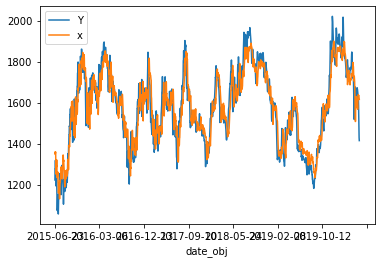

In [103]:
plot_df.plot()

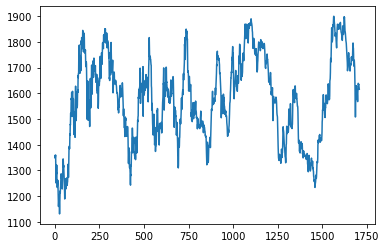

In [104]:
plt.plot(plot_x)

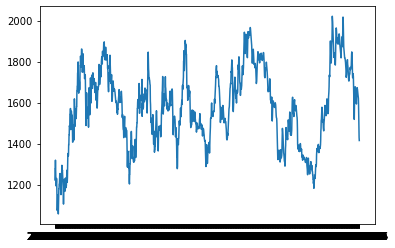

In [105]:
plt.plot(plot_y)

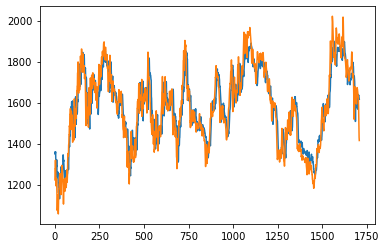

In [106]:
plt.plot(range(len(plot_x)),np.array([plot_x,plot_y]).T)

In [107]:
len(plot_x)

1708

No handles with labels found to put in legend.


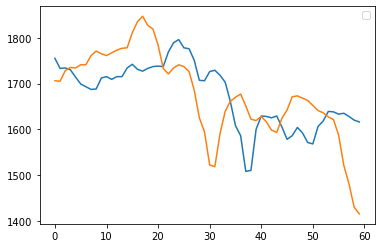

In [108]:
plt.plot(range(len(plot_x[len(plot_x)-60:])), np.array([plot_x[len(plot_x)-60:], plot_y[len(plot_y)-60:]]).T)
plt.legend()

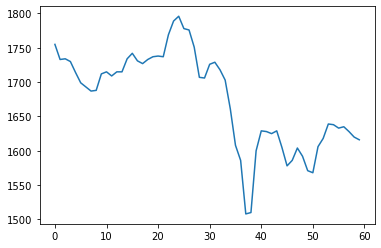

In [109]:
plt.plot(plot_x[len(plot_x)-60:])

In [110]:
len(plot_x)

1708

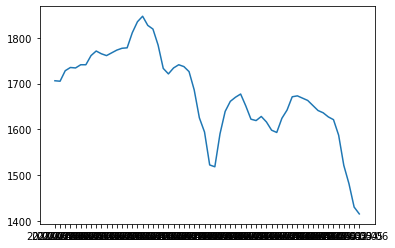

In [111]:
plt.plot(plot_y[len(plot_y)-60:])

In [112]:
x_series = pd.Series(plot_x, name='Predict')

In [113]:
type(x_series)

pandas.core.series.Series

In [114]:
type(plot_y)

pandas.core.series.Series

In [115]:
y_series = plot_y.reindex(x_series.index)

ValueError: cannot reindex from a duplicate axis

In [116]:
y_series

NameError: name 'y_series' is not defined

In [117]:
x_series

0       1358
1       1348
2       1349
3       1357
4       1360
        ... 
1703    1633
1704    1635
1705    1628
1706    1620
1707    1616
Name: Predict, Length: 1708, dtype: int64

In [118]:
pd.concat([y_series, x_series],  axis=1).iloc[1705-60:].plot()

NameError: name 'y_series' is not defined

In [119]:
learn.save('stage-final')
learn.export()

# Load in the full data (recent rows will have been dropped because Ys were N/A)

In [120]:
prediction_df = item_df_training

In [121]:
prediction_df = prediction_df.fillna(method='ffill').fillna(method='bfill').fillna(0)

In [122]:
predict_data = TabularDataBunch.from_df(path, prediction_df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=[])

In [123]:
predict_learn = tabular_learner(data, layers=[500,500,100], emb_szs={'native-country': 10}, metrics=mean_squared_error)

In [124]:
predict_learn.load('stage-final')

Learner(data=TabularDataBunch;

Train: LabelList (1741 items)
x: TabularList
Red%20chinchompa price 17 days ago -1.8165; Red%20chinchompa price 31 days ago -1.7621; Red%20chinchompa price 58 days ago -1.6579; Red%20chinchompa price 21 days ago -1.7998; Red%20chinchompa price 43 days ago -1.7096; Red%20chinchompa price 40 days ago -1.7218; Red%20chinchompa price 41 days ago -1.7175; Red%20chinchompa price 56 days ago -1.6640; Red%20chinchompa price 77 days ago -1.6070; Red%20chinchompa price 14 days ago -1.8298; Red%20chinchompa price 46 days ago -1.6983; Red%20chinchompa price 69 days ago -1.6281; Red%20chinchompa price 66 days ago -1.6356; Red%20chinchompa price 4 days ago -1.8686; Red%20chinchompa price 44 days ago -1.7057; Red%20chinchompa price 15 days ago -1.8253; Red%20chinchompa price 73 days ago -1.6170; Red%20chinchompa price 70 days ago -1.6253; Red%20chinchompa price 39 days ago -1.7267; Red%20chinchompa price 12 days ago -1.8387; Red%20chinchompa price 72 days ago -1.6197; 

In [125]:
predict_learn.show_results(ds_type=DatasetType.Train)

In [130]:
predictions = [int(learn.predict(prediction_df.iloc[i])[1]) for i in range(len(prediction_df))]

In [131]:
prediction_df.tail()

Red%20chinchompa price  Red%20chinchompa price 0 days ago  \
date_obj                                                                
2020-05-09                    1587                               1587   
2020-05-10                    1521                               1521   
2020-05-11                    1481                               1481   
2020-05-12                    1430                               1430   
2020-05-13                    1415                               1415   

            Red%20chinchompa price 1 days ago  \
date_obj                                        
2020-05-09                             1621.0   
2020-05-10                             1587.0   
2020-05-11                             1521.0   
2020-05-12                             1481.0   
2020-05-13                             1430.0   

            Red%20chinchompa price 2 days ago  \
date_obj                                        
2020-05-09                             1627.0   
2020-05-10                             1621.0   
2020-05-11                             1587.0   
2020-05-12                             1521.0   
2020-05-13                             1481.0   

            Red%20chinchompa price 3 days ago  \
date_obj                                        
2020-05-09                             1636.0   
2020-05-10                             1627.0   
2020-05-11                             1621.0   
2020-05-12                             1587.0   
2020-05-13                             1521.0   

            Red%20chinchompa price 4 days ago  \
date_obj                                        
2020-05-09                             1641.0   
2020-05-10                             1636.0   
2020-05-11                             1627.0   
2020-05-12                             1621.0   
2020-05-13                             1587.0   

            Red%20chinchompa price 5 days ago  \
date_obj                                        
2020-05-09                             1652.0   
2020-05-10                             1641.0   
2020-05-11                             1636.0   
2020-05-12                             1627.0   
2020-05-13                             1621.0   

            Red%20chinchompa price 6 days ago  \
date_obj                                        
2020-05-09                             1663.0   
2020-05-10                             1652.0   
2020-05-11                             1641.0   
2020-05-12                             1636.0   
2020-05-13                             1627.0   

            Red%20chinchompa price 7 days ago  \
date_obj                                        
2020-05-09                             1668.0   
2020-05-10                             1663.0   
2020-05-11                             1652.0   
2020-05-12                             1641.0   
2020-05-13                             1636.0   

            Red%20chinchompa price 8 days ago  ...  \
date_obj                                       ...   
2020-05-09                             1673.0  ...   
2020-05-10                             1668.0  ...   
2020-05-11                             1663.0  ...   
2020-05-12                             1652.0  ...   
2020-05-13                             1641.0  ...   

            Red%20chinchompa price 60 day rolling average  \
date_obj                                                    
2020-05-09                                    1695.533333   
2020-05-10                                    1691.416667   
2020-05-11                                    1686.966667   
2020-05-12                                    1682.000000   
2020-05-13                                    1676.983333   

            Red%20chinchompa price 90 day rolling average  \
date_obj                                                    
2020-05-09                                    1740.244444   
2020-05-10                                    1735.811111   
2020-05-11                               

In [133]:
prediction_df['predictions'] = predictions

In [135]:
prediction_df['predictions'].tail(30)

date_obj
2020-04-14    1508
2020-04-15    1510
2020-04-16    1600
2020-04-17    1629
2020-04-18    1628
2020-04-19    1625
2020-04-20    1629
2020-04-21    1605
2020-04-22    1578
2020-04-23    1586
2020-04-24    1604
2020-04-25    1592
2020-04-26    1571
2020-04-27    1568
2020-04-28    1606
2020-04-29    1618
2020-04-30    1639
2020-05-01    1638
2020-05-02    1633
2020-05-03    1635
2020-05-04    1628
2020-05-05    1620
2020-05-06    1616
2020-05-07    1607
2020-05-08    1601
2020-05-09    1566
2020-05-10    1496
2020-05-11    1470
2020-05-12    1435
2020-05-13    1428
Name: predictions, dtype: int64

In [ ]:
prediction_df

In [29]:
item = 'Adamant%20brutal price'

In [32]:
def join_dfs(item_dfs):
    pass
